## Low voltage network

<img src="./svg/bench_1.svg", width=800>

In [1]:
import numpy as np
inv = np.linalg.inv

$$ \sf \mathbf{Y} = \mathbf{A} \mathbf{Y}_{lines} \mathbf{A}^{T} $$

In [2]:
Eye = np.eye(4)

A_bus = np.array([
    [ 1, 0, 0, 0],
    [-1, 1, 0, 0],
    [ 0,-1, 1, 1],
    [ 0, 0,-1, 0],
    [ 0, 0, 0,-1]   
])

A = np.kron(A_bus,Eye)


Z_line_1 = np.array([[0.540 + 0.777j, 0.049 + 0.505j, 0.049 + 0.462j, 0.049 + 0.436j],
                     [0.049 + 0.505j, 0.540 + 0.777j, 0.049 + 0.505j, 0.049 + 0.462j],
                     [0.049 + 0.462j, 0.049 + 0.505j, 0.540 + 0.777j, 0.049 + 0.505j],
                     [0.049 + 0.436j, 0.049 + 0.462j, 0.049 + 0.505j, 0.540 + 0.777j]])


def diag_2d_inv(Z_lines):
    
    N_cols = 0
    for item in Z_lines:
        N_cols += item.shape[0]
    
    Y = np.zeros((N_cols,N_cols))+0j
    it = 0
    for item in Z_lines:
        diag = np.zeros((len(Z_lines),))
        diag[it] = 1
        I = np.diag(diag)
        Y += np.kron(I,np.linalg.inv(item))
        it += 1
        
    return Y
        
    
Y_lines = diag_2d_inv([0.5*Z_line_1,1.0*Z_line_1,1.0*Z_line_1,Z_line_1])

Y = A @ Y_lines @ A.T

/home/jmmauricio/bin/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in reciprocal


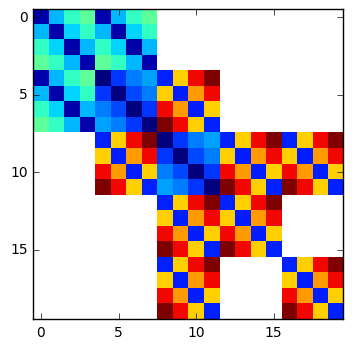

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
f = plt.figure()
ax = f.add_subplot(111)
ax.imshow(np.abs(Y**-1), interpolation='nearest')
f.canvas.draw()

In [4]:
alpha = np.exp(1j*2.0/3.0*np.pi)

def vec3(amp,deg_ang):
    vec = np.array([[1.0],[np.exp(-2.0/3.0j*np.pi)],[np.exp(-4.0/3.0j*np.pi)]])
    return amp*vec*np.exp(-1j*np.deg2rad(deg_ang))
    
def vec4(amp,deg_ang):
    vec = np.array([[1.0],[np.exp(-2.0/3.0j*np.pi)],[np.exp(-4.0/3.0j*np.pi)]])
    abc = amp*vec*np.exp(-1j*np.deg2rad(deg_ang))   
    n = -np.sum(abc)
    return np.vstack((abc,n))
    

$$ 
\sf \mathbf{i} =  \mathbf{Y} \mathbf{v} 
$$



$$ 
\sf
\mathbf{Y} =
\left[
\begin{array}{r|r}
\sf \mathbf{Y}_{slack} &  \sf\mathbf{Y}_{sr} \\
\hline
\sf\mathbf{Y}_{rs} & \sf\mathbf{Y}_r
\end{array} 
\right]
$$

$$ 
\sf
\mathbf{v} =
\left[
\begin{array}{r}
\sf \mathbf{v}_{src} \\
\hline
\sf \mathbf{v}_{uk} 
\end{array} 
\right]
$$

$$ 
\sf
\mathbf{i} =
\left[
\begin{array}{r}
\sf \mathbf{i}_{uk} \\
\hline
\sf \mathbf{i}_{src} 
\end{array} 
\right]
$$

$$
\left[
\begin{array}{r}
\sf \mathbf{i}_{uk} \\
\hline
\sf \mathbf{i}_{src} 
\end{array} 
\right]
=
\left[
\begin{array}{r|r}
\sf \mathbf{Y}_{slack} &  \sf\mathbf{Y}_{sr} \\
\hline
\sf \mathbf{Y}_{rs} & \sf\mathbf{Y}_r
\end{array} 
\right]
\left[
\begin{array}{r}
\sf \mathbf{v}_{src} \\
\hline
\sf \mathbf{v}_{uk} 
\end{array} 
\right]
$$


$$ 
\sf \mathbf{v}_{uk} =  \mathbf{Y}_r^{-1} \left(\mathbf{i}_{src} - \mathbf{Y}_{rs} \mathbf{v}_{src} \right)
$$

$$ 
\sf \mathbf{i}_{uk} =  \mathbf{Y}_{slack} \mathbf{v}_{src} + \mathbf{Y}_{sr} \mathbf{v}_{uk} 
$$


In [5]:
V_src_1 = np.array(vec4(231,0))
I_src_2 = np.array(vec4(10,0))
I_src_3 = np.array(vec4(0,0))
I_src_4 = np.array([0,0,-5,0]).reshape(4,1)
I_src_5 = np.array(vec4(-20,0))

V_src = np.vstack((V_src_1))
I_src = np.vstack((I_src_2,I_src_3,I_src_4,I_src_5))

Y_slack = Y[0:4,0:4]
Y_sr = Y[0:4,4:]
Y_rs = Y[4:,0:4]
Y_r = Y[4:,4:]


V_uk =inv(Y_r)@(I_src -Y_rs @ V_src)
I_uk =Y_slack @ V_src + Y_sr @ V_uk

print(np.abs(V_uk))
print(np.abs(I_uk))

[[ 228.62373706]
 [ 227.51374498]
 [ 230.72206945]
 [   1.07047554]
 [ 219.55439027]
 [ 215.67748312]
 [ 225.00561055]
 [   2.90620772]
 [ 219.43560014]
 [ 213.5871561 ]
 [ 229.73125432]
 [   5.35237771]
 [ 210.87338993]
 [ 206.05283973]
 [ 214.74494659]
 [   2.62629168]]
[[  1.00000000e+01]
 [  1.00000000e+01]
 [  8.66025404e+00]
 [  1.81327666e-13]]


## Extended network

<img src="./svg/bench_1_extended.svg", width=800>

In [6]:
A_bus = np.array([
    [ 1, 0, 0, 0, 0, 0, 0],
    [-1, 1, 0, 0,-1, 0, 0],
    [ 0,-1, 1, 1, 0, 0, 0],
    [ 0, 0,-1, 0, 0,-1, 0],
    [ 0, 0, 0,-1, 0, 0,-1],
    [ 0, 0, 0, 0, 1, 0, 0],
    [ 0, 0, 0, 0, 0, 1, 0],   
    [ 0, 0, 0, 0, 0, 0, 1]   
])

A = np.kron(A_bus,Eye)

Z_vsc = np.diag([0.01+0.1j, 0.01+0.1j, 0.01+0.1j, 0.01+0.1j])


Y_lines = diag_2d_inv([0.5*Z_line_1,1.0*Z_line_1,1.0*Z_line_1,Z_line_1,Z_vsc,Z_vsc,Z_vsc])

Y = A @ Y_lines @ A.T

In [7]:
V_src_6 = V_uk[0:4] + np.matmul(Z_vsc,I_src_2)
V_src_7 = V_uk[8:12] + np.matmul(Z_vsc,I_src_3)
V_src_8 = V_uk[12:16] + np.matmul(Z_vsc,I_src_4)

Problem: Y must be resorted beacuase nodes 6,7,8 are at the end

In [8]:
sorter = np.array([1,6,7,8,2,3,4,5])-1 # new order

I_perm_bus = np.zeros((8,8)) 

I_perm_bus[sorter,range(8)] = 1

I_perm = np.kron(I_perm_bus,Eye)

Y_sorted = np.matmul(np.matmul(I_perm,Y),I_perm)

In [18]:
V_src_1 = np.array(vec4(231,0))
I_src_2 = np.array(vec4(0,0))
I_src_3 = np.array(vec4(0,0))
I_src_4 = np.array(vec4(0,0))
I_src_5 = np.array(vec4(0,0))



V_src = np.vstack((V_src_1,V_src_6,V_src_7,V_src_8)) 
I_src = np.vstack((I_src_2,I_src_3,I_src_4,I_src_5))

n_known =  16
Y_slack = Y_sorted[0:n_known,0:n_known]
Y_sr = Y_sorted[0:n_known,n_known:]
Y_rs = Y_sorted[n_known:,0:n_known]
Y_r = Y_sorted[n_known:,n_known:]


V_uk =inv(Y_r)@(I_src -Y_rs @ V_src)
I_uk =Y_slack @ V_src + Y_sr @ V_uk

V_full = np.vstack((V_src, V_uk))
I_full = np.vstack((I_uk ,I_src))

print(np.abs(V_full))
print(np.abs(I_full))


[[  2.31000000e+02]
 [  2.31000000e+02]
 [  2.31000000e+02]
 [  7.10542736e-14]
 [  2.28714451e+02]
 [  2.27613206e+02]
 [  2.30817018e+02]
 [  1.07047554e+00]
 [  2.19435600e+02]
 [  2.13587156e+02]
 [  2.29731254e+02]
 [  5.35237771e+00]
 [  2.10873390e+02]
 [  2.06052840e+02]
 [  2.15188857e+02]
 [  2.62629168e+00]
 [  2.28623011e+02]
 [  2.27514239e+02]
 [  2.30721031e+02]
 [  1.07084533e+00]
 [  2.19550279e+02]
 [  2.15682916e+02]
 [  2.25011539e+02]
 [  2.90606062e+00]
 [  2.19423899e+02]
 [  2.13603033e+02]
 [  2.29299920e+02]
 [  5.34817053e+00]
 [  2.10873390e+02]
 [  2.06052840e+02]
 [  2.15188857e+02]
 [  2.62629168e+00]]
[[  1.00014483e+01]
 [  9.99689973e+00]
 [  8.65444446e+00]
 [  4.20806267e-03]
 [  1.99124975e+01]
 [  1.98920189e+01]
 [  1.93309548e+01]
 [  2.00287803e-01]
 [  9.99872369e+00]
 [  9.99134309e+00]
 [  9.97518492e+00]
 [  1.06750938e-02]
 [  1.48893855e-01]
 [  1.78778921e-01]
 [  4.57668615e+00]
 [  1.90974577e-01]
 [  0.00000000e+00]
 [  0.00000000e+00]

## Only voltages network 

In [14]:

print(V_full)

[[  2.31000000e+02 +0.00000000e+00j]
 [ -1.15500000e+02 +2.00051868e+02j]
 [ -1.15500000e+02 -2.00051868e+02j]
 [  4.26325641e-14 -5.68434189e-14j]
 [  2.28708695e+02 -1.62250000e+00j]
 [ -1.14133231e+02 +1.96929878e+02j]
 [ -1.15984269e+02 -1.99559878e+02j]
 [ -3.08695462e-01 -1.02500000e+00j]
 [  2.19043477e+02 -1.31125000e+01j]
 [ -1.04086027e+02 +1.86508906e+02j]
 [ -1.22001473e+02 -1.94658906e+02j]
 [ -1.54347731e+00 -5.12500000e+00j]
 [  2.10213259e+02 -1.66725000e+01j]
 [ -9.42198491e+01 +1.83249537e+02j]
 [ -1.19152651e+02 -1.79189537e+02j]
 [ -2.04325916e+00 -1.65000000e+00j]
 [  2.28607972e+02 -2.62229848e+00j]
 [ -1.13218168e+02 +1.97343294e+02j]
 [ -1.16797525e+02 -1.98973698e+02j]
 [ -3.09766435e-01 -1.02506316e+00j]
 [  2.19284529e+02 -1.07990963e+01j]
 [ -1.03846375e+02 +1.89037168e+02j]
 [ -1.19285917e+02 -1.90790626e+02j]
 [ -1.30440118e+00 -2.59686848e+00j]
 [  2.19032355e+02 -1.31024903e+01j]
 [ -1.04101109e+02 +1.86518672e+02j]
 [ -1.21907574e+02 -1.94208642e+02j]
 

In [15]:
I_full.shape

(48, 1)

v_j_a - (R_a * i_a + R_ab*i_b + ...) - d(L_a*i_a + L_ab* i_b + ...) - v_k_a = 0 

v_j - R * i - L * di - v_k = 0



In [61]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.layouts import gridplot
output_notebook()

Loading BokehJS ...

## Single line in time domain

In [ ]:
import numba
from numba import float64, complex128
Omega = 2.0*np.pi*50.0

Long = 0.5
R_line_1 = Z_line_1.real*Long
L_line_1 = Z_line_1.imag/Omega*Long

inv_L_line_1 = inv(L_line_1)

@numba.jit(nopython=True)
def f_grid(t,u,x,y,param):
       
    v_j = u[0:4]
    v_k = u[4:8]
    i = x
    
    di = inv_L_line_1 @ (v_j - R_line_1 @ i - v_k)
    
    return di
    
@numba.jit('float64[:,:](complex128[:,:])',nopython=True)
def real(x):
    N = x.shape[0]
    out =  np.zeros((N,1))
    for it in range(N):
        out[it,0] = x[it,0].real
    
    
    return out     

    
@numba.jit(nopython=True)
def run():
    dt = 50e-6
    t_end = 10.0   
    decimation = 10
    
    N_steps = int(t_end/dt)
    N_saves = int(t_end/dt/decimation)
    T = np.zeros((N_saves,1))
    X = np.zeros((N_saves,4))
    Y = np.zeros((N_saves,8))
    
    u = np.zeros((8,1))
    ang = np.zeros((4,1))

    
    t = 0.0
    
    x_0 =real((I_uk[0:4]*np.exp(1j*0)))
    
    x = x_0

    X[0,:] = x[:,0]
    
    param = np.array([0.0])

    v_j_cplx = V_src[0:4,:]
    v_k_cplx = V_uk[0:4,:]
        
    it = 0
    it_decimation = 0
    it_save = 0
    solver = 2
    for it in range(N_steps+1):   

        if t > 1.0:
            v_j_cplx = V_src[0:4,:]*1.01
        
        rot = np.exp(1j*t*Omega)
    
        v_j = real(v_j_cplx*rot)
        v_k = real(v_k_cplx*rot)


        
        u[0:4,:] = v_j
        u[4:8,:] = v_k
    

            
        t += dt        

        if solver == 1:
            # solver forward euler 
            x = x + dt*(f_grid(t,u,x,0.0,param))
        
        if solver == 2:
            # solver trapezoidal 1 step
            f_1 = f_grid(t,u,x,0.0,param)
            x_1 = x + dt*f_1
            x = x + 0.5*dt*(f_grid(t,u,x_1,0.0,param) + f_1)

 
        
        if it_decimation >= decimation:
            it_save += 1  
            X[it_save,:] = x[:,0]
            Y[it_save,0:4] = v_j[:,0]
            #Y[it_save,4:8] = v_k[:,0]
            T[it_save,:] = t
            it_decimation = 0
            
        it_decimation += 1
              
        
        
    return T,X,Y
   
#
%timeit run()  

#f_grid(0.0,np.zeros((8,1)),np.zeros((4,1)),np.zeros((1,1)),np.zeros((1,1)))

T,X,Y = run()



In [ ]:
fig1 = figure(width=800, height=300)
fig1.line(x=T[:,0], y=X[:,0], color="red")
fig1.line(x=T[:,0], y=X[:,1], color="green")
fig1.line(x=T[:,0], y=X[:,2], color="blue")
fig1.line(x=T[:,0], y=X[:,3], color="orange")

fig2 = figure(width=800, height=300,  x_range=fig1.x_range,)
fig2.line(x=T[:,0], y=Y[:,0], color="red")
fig2.line(x=T[:,0], y=Y[:,1], color="green")
fig2.line(x=T[:,0], y=Y[:,2], color="blue")
fig2.line(x=T[:,0], y=Y[:,3], color="orange")

figs = gridplot([[fig1], [fig2]])

show(figs)


## Full system in time domain

In [19]:
def diag_2d(Z_lines):
    
    N_cols = 0
    for item in Z_lines:
        N_cols += item.shape[0]
    
    Z = np.zeros((N_cols,N_cols))+0j
    it = 0
    for item in Z_lines:
        diag = np.zeros((len(Z_lines),))
        diag[it] = 1
        I = np.diag(diag)
        Z += np.kron(I,item)
        it += 1
        
    return Z
        

In [21]:
I_full.shape

(32, 1)

In [47]:
A_bus = np.array([
    [ 1, 0, 0, 0, 0, 0, 0],
    [-1, 1, 0, 0,-1, 0, 0],
    [ 0,-1, 1, 1, 0, 0, 0],
    [ 0, 0,-1, 0, 0,-1, 0],
    [ 0, 0, 0,-1, 0, 0,-1],
    [ 0, 0, 0, 0, 1, 0, 0],
    [ 0, 0, 0, 0, 0, 1, 0],   
    [ 0, 0, 0, 0, 0, 0, 1]   
])

A = np.kron(A_bus,Eye)

Z_vsc = np.diag([0.01+0.1j, 0.01+0.1j, 0.01+0.1j, 0.01+0.1j])


Z_lines = diag_2d([0.5*Z_line_1,1.0*Z_line_1,1.0*Z_line_1,Z_line_1,Z_vsc,Z_vsc,Z_vsc])

Omega = 2.0*np.pi*50.0
R_lines = Z_lines.real
X_lines = Z_lines.imag
L_lines = X_lines/Omega

R = A @ R_lines @ A.T
L = A @ L_lines @ A.T
inv_L_lines = inv(L_lines)

In [41]:
V = A.T @ V_full
# I_abcn = A X_l
#  A @ A.T = I
# A @ A.T @ I_abcn = A @ X_l 
#   A.T @ I_abcn =  X_l 
X_l =  A.T @ I_full

In [45]:
- R_lines @ X_l + V

array([[ -5.17999829 +1.65410173j],
       [  2.20658855 -3.21476245j],
       [  2.70504079 +5.7570582j ],
       [  0.19780841 +1.07061149j],
       [ 24.36159377+11.42427377j],
       [-17.43991887+23.09070392j],
       [ -1.11964850-17.38823709j],
       [  1.21062272 +4.00449853j],
       [  3.64236242 +3.50613433j],
       [ -7.68693333 -1.06473248j],
       [ -2.86431417-10.99180747j],
       [  0.22586540 -3.55415231j],
       [-14.47399509-10.48660569j],
       [ 11.58663081-15.08190252j],
       [ -2.74978020 +8.55329033j],
       [ -1.23466689 -4.09477993j],
       [ -9.62328764 -9.17530041j],
       [ 10.38763509 -8.06421227j],
       [ -3.20607273 +8.93728271j],
       [ -0.99498960 -1.569998j  ],
       [  8.81821442 +3.56880933j],
       [ -9.88207707 +3.26754534j],
       [ -2.80043359-15.01426602j],
       [  0.48231015 -3.46728945j],
       [-18.39471292-14.05020152j],
       [ 18.99831900-14.09375668j],
       [ -2.35512553+19.78416077j],
       [ -1.73349272 -0.6249

In [48]:
inv_L_lines @ (- R_lines @ X_l + V)

array([[ -1.06244890e+04 +2406.07661235j],
       [  5.67204260e+03-10432.39095974j],
       [  5.24852236e+03+10887.43921155j],
       [ -6.62063828e+02 -1357.47302522j],
       [  2.49472411e+04 +4093.99746266j],
       [ -2.33060166e+04+21273.15429539j],
       [ -6.32332195e+02-25328.25491177j],
       [  7.59380481e+02 +3134.67035834j],
       [  5.80566987e+03 +5519.10131404j],
       [ -7.28600530e+03 +1631.30295718j],
       [ -1.09487873e+03 -9018.4491901j ],
       [  1.87739235e+03  +357.4733885j ],
       [ -1.45553306e+04 -4384.74962381j],
       [  1.59958854e+04-11885.94855957j],
       [ -2.86689751e+03+15018.026548j  ],
       [  2.04971828e+01 -1888.61954996j],
       [ -3.02324498e+04-28825.05634733j],
       [  3.26337181e+04-25334.47003035j],
       [ -1.00721745e+04+28077.30170791j],
       [ -3.12585203e+03 -4932.29417628j],
       [  2.77032376e+04+11211.74516372j],
       [ -3.10454607e+04+10265.29643023j],
       [ -8.79782158e+03-47168.70784157j],
       [  1

In [145]:
X_l

array([[  2.99135239e+01 -1.31771895e-01j],
       [ -1.50749100e+01 +2.58085703e+01j],
       [ -9.56539448e+00 -2.54574187e+01j],
       [ -6.78030622e-02 -1.88838136e-01j],
       [ -2.99107968e+01 +1.36947258e-01j],
       [  1.50771684e+01 -2.58008494e+01j],
       [  1.45560621e+01 +2.54353971e+01j],
       [  6.99257078e-02 +1.97589294e-01j],
       [  1.00868142e+01 +1.12675541e-01j],
       [ -4.91746394e+00 +8.80969444e+00j],
       [ -4.47530695e-01 -9.11630137e+00j],
       [  7.87912621e-02 +1.64175832e-01j],
       [  9.99872098e+00 -7.36176973e-03j],
       [ -4.99922267e+00 +8.65070572e+00j],
       [ -4.99856510e+00 -8.63241919e+00j],
       [  1.68572717e-03 -1.05411551e-02j],
       [  1.99120758e+01 -1.29585488e-01j],
       [ -1.00779457e+01 +1.71501437e+01j],
       [ -9.55749699e+00 -1.68029779e+01j],
       [ -7.16114350e-02 -1.87048139e-01j],
       [  8.80932699e-02 +1.20037311e-01j],
       [  8.17587318e-02 +1.58988718e-01j],
       [  4.55103441e+00 -4.8388

In [163]:
import numba

@numba.jit(nopython=True)
def f_grid(t,u,x,y,param):
       
    V = u

    X_l = x
    
    dX_l = inv_L_lines @ (- R_lines @ X_l + (A.T) @ u)
    
    return dX_l
    
@numba.jit('float64[:,:](complex128[:,:])',nopython=True)
def real(x):
    N = x.shape[0]
    out =  np.zeros((N,1))
    for it in range(N):
        out[it,0] = x[it,0].real
    
    
    return out     

    
@numba.jit(nopython=True)
def run():
    dt = 10e-6
    t_end = 10.0   
    decimation = 100
    
    N_steps = int(t_end/dt)
    N_saves = int(t_end/dt/decimation)+1
    T = np.zeros((N_saves,1))
    X = np.zeros((N_saves,28))
    Y1 = np.zeros((N_saves,32))
    Y2 = np.zeros((N_saves,32))
    
    u = np.zeros((32,1))
   
    t = 0.0
    
    x_0 = real(np.exp(1j*t*Omega)*X_l)    
    x = x_0

    X[0,:] = x[:,0]
    
    param = np.array([0.0])

    v_cplx = V_full
        
    it = 0
    it_decimation = 0
    it_save = 0
    solver = 1
    for it in range(N_steps+1):   

        #if t > 1.0:
        #    v_j_cplx = V_src[0:4,:]*1.01
        
        rot = np.exp(-1j*t*Omega)
      
        u  = real(v_cplx*rot)
            
        t += dt        

        if solver == 1:
            # solver forward euler 
            x = x + dt*(f_grid(t,u,x,0.0,param))
        
        if solver == 2:
            # solver trapezoidal 1 step
            f_1 = f_grid(t,u,x,0.0,param)
            x_1 = x + dt*f_1
            x = x + 0.5*dt*(f_grid(t,u,x_1,0.0,param) + f_1)

 
        
        if it_decimation >= decimation:
            it_save += 1  
            X[it_save,:] = x[:,0]
            Y1[it_save,:] = (A @ x)[:,0]
            Y2[it_save,:] = u[:,0]
            T[it_save,:] = t
            it_decimation = 0
            
        it_decimation += 1
              
        
        
    return T,X,Y1,Y2
   
#
%timeit run()  

#f_grid(0.0,np.zeros((8,1)),np.zeros((4,1)),np.zeros((1,1)),np.zeros((1,1)))

T,X,Y1,Y2 = run()

1 loop, best of 3: 11.5 s per loop


In [164]:
n = 4
fig1 = figure(width=800, height=300)
fig1.line(x=T[:,0], y=Y2[:,4*n+0], color="red")
fig1.line(x=T[:,0], y=Y2[:,4*n+1], color="green")
fig1.line(x=T[:,0], y=Y2[:,4*n+2], color="blue")
fig1.line(x=T[:,0], y=Y2[:,4*n+3], color="orange")

fig2 = figure(width=800, height=300,  x_range=fig1.x_range,)
fig2.line(x=T[:,0], y=Y1[:,4*n+0], color="red")
fig2.line(x=T[:,0], y=Y1[:,4*n+1], color="green")
fig2.line(x=T[:,0], y=Y1[:,4*n+2], color="blue")
fig2.line(x=T[:,0], y=Y1[:,4*n+3], color="orange")

fig3 = figure(width=800, height=300,  x_range=fig1.x_range,)
fig3.line(x=T[:,0], y=X[:,4*n+0], color="red")
fig3.line(x=T[:,0], y=X[:,4*n+1], color="green")
fig3.line(x=T[:,0], y=X[:,4*n+2], color="blue")
fig3.line(x=T[:,0], y=X[:,4*n+3], color="orange")

figs = gridplot([[fig1], [fig2],  [fig3]])

show(figs)

In [166]:
np.abs(A @ I_full)

ValueError: shapes (32,28) and (32,1) not aligned: 28 (dim 1) != 32 (dim 0)

In [ ]:
(I_uk[0:4]*np.exp(1j*0)).real

In [ ]:
lines = [
         {'bus_i':1, 'bus_j':2, 'km':0.1, 'code':'OH1'},
         {'bus_i':2, 'bus_j':3, 'km':0.5, 'code':'OH1'},
         {'bus_i':3, 'bus_j':4, 'km':0.2, 'code':'OH1'},
         {'bus_i':3, 'bus_j':5, 'km':0.3, 'code':'OH1'},    
        ]

buses = [
         {'bus':1, 'type':'v','kV':[0.231]*3, 'deg':0.0, 'pos_x':0.0, 'pos_y':0},
         {'bus':2, 'type':'pq','kW':[-10.0]*3,'kvar':[-2.0]*3, 'pos_x':0.2, 'pos_y':0.0},
         {'bus':3, 'type':'pq','kW':[0.0]*3,'kvar':[0.0]*3, 'pos_x':0.4, 'pos_y':0},
         {'bus':4, 'type':'pq','kW':[20.0]*3,'kvar':[-1.0]*3, 'pos_x':0.4, 'pos_y':-0.2},  
         {'bus':5, 'type':'pq','kW':[-10.0]*3,'kvar':[-1.0]*3, 'pos_x':0.6, 'pos_y':0},   
        ]

line_codes = {'OH1':np.array([[0.540 + 0.777j, 0.049 + 0.505j, 0.049 + 0.462j, 0.049 + 0.436j],
                              [0.049 + 0.505j, 0.540 + 0.777j, 0.049 + 0.505j, 0.049 + 0.462j],
                              [0.049 + 0.462j, 0.049 + 0.505j, 0.540 + 0.777j, 0.049 + 0.505j],
                              [0.049 + 0.436j, 0.049 + 0.462j, 0.049 + 0.505j, 0.540 + 0.777j]]),
              'OH2':np.array([[1.369 + 0.812j, 0.049 + 0.505j, 0.049 + 0.462j, 0.049 + 0.436j], 
                              [0.049 + 0.505j, 1.369 + 0.812j, 0.049 + 0.505j, 0.049 + 0.462j], 
                              [0.049 + 0.462j, 0.049 + 0.505j, 1.369 + 0.812j, 0.049 + 0.505j], 
                              [0.049 + 0.436j, 0.049 + 0.462j, 0.049 + 0.505j, 1.369 + 0.812j]]),
              'OH3':np.array([[2.065 + 0.825j, 0.049 + 0.505j, 0.049 + 0.462j, 0.049 + 0.436j], 
                              [0.049 + 0.505j, 2.065 + 0.825j, 0.049 + 0.505j, 0.049 + 0.462j], 
                              [0.049 + 0.462j, 0.049 + 0.505j, 2.065 + 0.825j, 0.049 + 0.505j], 
                              [0.049 + 0.436j, 0.049 + 0.462j, 0.049 + 0.505j, 2.065 + 0.825j]]), 
              'UG1':np.array([[0.211 + 0.747j, 0.049 + 0.673j, 0.049 + 0.651j, 0.049 + 0.673j], 
                              [0.049 + 0.673j, 0.211 + 0.747j, 0.049 + 0.673j, 0.049 + 0.651j], 
                              [0.049 + 0.651j, 0.049 + 0.673j, 0.211 + 0.747j, 0.049 + 0.673j], 
                              [0.049 + 0.673j, 0.049 + 0.651j, 0.049 + 0.673j, 0.211 + 0.747j]]),
              'UG2':np.array([[0.314 + 0.762j, 0.049 + 0.687j, 0.049 + 0.665j, 0.049 + 0.687j], 
                              [0.049 + 0.687j, 0.314 + 0.762j, 0.049 + 0.687j, 0.049 + 0.665j], 
                              [0.049 + 0.665j, 0.049 + 0.687j, 0.314 + 0.762j, 0.049 + 0.687j], 
                              [0.049 + 0.687j, 0.049 + 0.665j, 0.049 + 0.687j, 0.314 + 0.762j]]), 
              'UG3':np.array([[0.871 + 0.797j, 0.049 + 0.719j, 0.049 + 0.697j, 0.049 + 0.719j], 
                              [0.049 + 0.719j, 0.871 + 0.797j, 0.049 + 0.719j, 0.049 + 0.697j], 
                              [0.049 + 0.697j, 0.049 + 0.719j, 0.871 + 0.797j, 0.049 + 0.719j], 
                              [0.049 + 0.719j, 0.049 + 0.697j, 0.049 + 0.719j, 0.871 + 0.797j]]),
              'EQU':np.array([[0.871 + 0.797j, 0.049 + 0.719j, 0.049 + 0.719j, 0.049 + 0.719j], 
                              [0.049 + 0.719j, 0.871 + 0.797j, 0.049 + 0.719j, 0.049 + 0.719j], 
                              [0.049 + 0.719j, 0.049 + 0.719j, 0.871 + 0.797j, 0.049 + 0.719j], 
                              [0.049 + 0.719j, 0.049 + 0.719j, 0.049 + 0.719j, 0.871 + 0.797j]]),
             }

Y_g = np.zeros((4,4))
Y_g[3,3] = 1.0/80.0

A_g_bus = np.zeros((5,5))

alpha = np.exp(1j*2.0/3.0*np.pi)

def vec3(amp,deg_ang):
    vec = np.array([[1.0],[np.exp(-2.0/3.0j*np.pi)],[np.exp(-4.0/3.0j*np.pi)]])
    return amp*vec*np.exp(-1j*np.deg2rad(deg_ang))
    
def vec4(amp,deg_ang):
    vec = np.array([[1.0],[np.exp(-2.0/3.0j*np.pi)],[np.exp(-4.0/3.0j*np.pi)]])
    if len(amp) == 1:
        abc = amp*vec*np.exp(-1j*np.deg2rad(deg_ang))  
    if len(amp) > 1:
        abc = np.array([[amp[0]*1.0*np.exp(-1j*np.deg2rad(deg_ang))],
                        [amp[1]*np.exp(-2.0/3.0j*np.pi)*np.exp(-1j*np.deg2rad(deg_ang))],
                        [amp[2]*np.exp(-4.0/3.0j*np.pi)*np.exp(-1j*np.deg2rad(deg_ang))]]) 
    n = -np.sum(abc)
    return np.vstack((abc,n))

def diag_2d(Z_lines):
    
    N_cols = 0
    for item in Z_lines:
        N_cols += item.shape[0]
    
    Y = np.zeros((N_cols,N_cols))+0j
    it = 0
    for item in Z_lines:
        diag = np.zeros((len(Z_lines),))
        diag[it] = 1
        I = np.diag(diag)
        Y += np.kron(I,np.linalg.inv(item))
        it += 1
        
    return Y
        
def A_eval(buses,lines):
    Eye = np.eye(4)
    N_buses = len(buses)
    N_lines = len(lines)
    
    nodes = []
    for item in buses:
        nodes += [item['bus']]
        
    b2n = dict(zip(nodes,range(N_buses)))
    A_bus = np.zeros((N_bus,N_lines))
       
    for it,line in zip(range(N_bus),lines):
        A_bus[b2n[line['bus_i']],it] =  1.0
        A_bus[b2n[line['bus_j']],it] = -1.0
        
    A = np.kron(A_bus,Eye)
    return A 
 
def Y_eval(buses,lines,line_codes):
    
    Y_line = []
    for it,line in zip(range(N_bus),lines):
        Y_line += [line['km']*line_codes[line['code']]]
    Y_lines = diag_2d(Y_line)
        
    A = A_eval(buses,lines)
    
    Y = np.matmul(np.matmul(A,Y_lines),A.T)
    return Y   

def V_vec(buses):
    
    V = []
    for bus in buses:
        if bus['type'] == 'v':
            V += [vec4(np.array(bus['kV'])*1000.0,bus['deg'])]
    return np.array(V[0])   

def PQ_vec(buses):
    
    PQ = []
    for bus in buses:
        if bus['type'] == 'pq':
            for it in range(3):
                PQ += [[bus['kW'][it]*1000.0+1j*bus['kvar'][it]*1000.0]]
            PQ += [[0.0+1j*0.0]]
    return np.array(PQ)  

import numba
@numba.jit(nopython=True)
def pf(Y,V_vec,PQ_vec,V_0):
    alpha = np.exp(1j*2.0/3.0*np.pi)
    
    Y_sorted = Y
    n_known =  4
    Y_slack = Y_sorted[0:n_known,0:n_known]
    Y_sr = Y_sorted[0:n_known,n_known:]
    Y_rs = Y_sorted[n_known:,0:n_known]
    Y_r = Y_sorted[n_known:,n_known:]

    I_vec = np.zeros((16,1))+0j
    V = V_0
    
    Z_r = np.linalg.inv(Y_r)
    
    for itera in range(100):
        for it in range(4):
            I_vec[4*it+0,0] = np.conjugate(PQ_vec[4*it+0,0]/V[4*it+0,0])
            I_vec[4*it+1,0] = np.conjugate(PQ_vec[4*it+1,0]/V[4*it+1,0])
            I_vec[4*it+2,0] = np.conjugate(PQ_vec[4*it+2,0]/V[4*it+2,0])
            I_vec[4*it+3,0] = -(I_vec[4*it+0,0] + I_vec[4*it+1,0] + I_vec[4*it+2,0])
        V = Z_r@(I_vec - Y_rs@V_vec)
        
        if np.sum(np.abs((V-V_0))**2) < 1e-12:
            break
        V_0 = V
        
        
    
    return V,itera,I_vec

    
    
Y = Y_eval(buses,lines,line_codes)

V_vec(buses)
PQ_vec(buses)
V_0 = (231.0+0j)*np.ones((16,1))
%timeit pf(Y,V_vec(buses),PQ_vec(buses), V_0)


V,itera,I_vec = pf(Y,V_vec(buses),PQ_vec(buses), V_0)
print(np.abs(V))
print(np.abs(I_vec))
print(np.conjugate(I_vec)*V)
print(itera)


V_full = np.vstack((V_vec(buses),V))

it = 0
for bus in buses:
    v_ag = V_full[4*it+0]
    v_bg = V_full[4*it+1]
    v_cg = V_full[4*it+2]
    v_ng = V_full[4*it+3]
    bus.update({'v_an':np.abs(v_ag-v_ng),
                'v_bn':np.abs(v_bg-v_ng),
                'v_cn':np.abs(v_cg-v_ng),
                'v_ng':np.abs(v_ng)})
    bus.update({'deg_an':np.angle(v_ag-v_ng, deg=True),
                'deg_bn':np.angle(v_bg-v_ng, deg=True),
                'deg_cn':np.angle(v_cg-v_ng, deg=True),
                'deg_ng':np.angle(v_ng, deg=True)})  
    it += 1
    

In [ ]:
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import ColumnDataSource, HoverTool, CustomJS
output_notebook()

In [ ]:
code = """
var buses = %s;
circle.data['v'] = 'hola';
""" % buses

hover = HoverTool()

hover.tooltips = [
    ("bus_id", "@bus_id"),
    ("v_an", " @v_an ∠ @deg_an"),
    ("v_bn", " @v_bn ∠ @deg_bn"),
    ("v_cn", " @v_cn ∠ @deg_cn"),
    ("v_ng", " @v_ng ∠ @deg_ng"),
]




p = figure(width=800, height=400, tools=[hover], toolbar_location=None, 
           title='Hover over points', x_range=[-0.2, 0.8], y_range=[-0.5, 0.5])
it = 0
bus_id = []
bus_i  = []

for bus in buses:
    bus_id += [bus['bus']]
    bus_i  += [it]
    it += 1

bus_id2i = dict(zip(bus_id,bus_i))


for line in lines:
    
    bus_i_x = buses[bus_id2i[line['bus_i']]]['pos_x']
    bus_i_y = buses[bus_id2i[line['bus_i']]]['pos_y']
    bus_j_x = buses[bus_id2i[line['bus_j']]]['pos_x']
    bus_j_y = buses[bus_id2i[line['bus_j']]]['pos_y']

    p.line([bus_i_x,bus_j_x],[bus_i_y,bus_j_y])

x = []
y = []
bus_id = []
v_an,v_bn,v_cn,v_ng = [],[],[],[]
deg_an,deg_bn,deg_cn,deg_ng = [],[],[],[]
for bus in buses:   
    bus_id += [bus['bus']]
    x += [bus['pos_x']]
    y += [bus['pos_y']]
    v_an += [' {:2.1f} '.format(float(bus['v_an']))]
    v_bn += [' {:2.1f} '.format(float(bus['v_bn']))]
    v_cn += [' {:2.1f} '.format(float(bus['v_cn']))]
    v_ng += [' {:2.1f} '.format(float(bus['v_ng']))]
    deg_an += [' {:2.2f}° V'.format(float(bus['deg_an']))]
    deg_bn += [' {:2.2f}° V'.format(float(bus['deg_bn']))]
    deg_cn += [' {:2.2f}° V'.format(float(bus['deg_cn']))]
    deg_ng += [' {:2.2f}° V'.format(float(bus['deg_ng']))]    
    #cr = p.circle([bus['pos_x']], [bus['pos_y']], size=20, color="navy", alpha=0.5)

source = ColumnDataSource(data=dict(x=x, y=y, bus_id=bus_id,
                                    v_an=v_an, v_bn=v_bn, v_cn=v_cn, v_ng=v_ng, 
                                    deg_an=deg_an, deg_bn=deg_bn, deg_cn=deg_cn, deg_ng=deg_ng))
cr = p.circle(source=source, x='x', y='y', size=30, color="navy", alpha=0.5)

#callback = CustomJS(args={'circle': cr.data_source}, code=code)


show(p)


In [ ]:
from datetime import date
from random import randint

from bokeh.io import output_file, show
from bokeh.layouts import widgetbox
from bokeh.models import ColumnDataSource
from bokeh.models.widgets import DataTable, DateFormatter, TableColumn

data = dict(
        dates=[date(2014, 3, i+1) for i in range(10)],
        downloads=[randint(0, 100) for i in range(10)],
    )
source = ColumnDataSource(data)

columns = [
        TableColumn(field="dates", title="Date", formatter=DateFormatter()),
        TableColumn(field="downloads", title="Downloads"),
    ]
data_table = DataTable(source=source, columns=columns, width=400, height=280)

show(widgetbox(data_table))

In [ ]:
bus['v_an']

<img src="./svg/bench_3branch.svg", width=800>

In [213]:
import sympy as sym

Z_1,Z_2,Z_3 = sym.symbols('Z_1,Z_2,Z_3')
R_1,R_2,R_3 = sym.symbols('R_1,R_2,R_3')
L_1,L_2,L_3 = sym.symbols('L_1,L_2,L_3')
I_1,I_2,I_3,I_4 = sym.symbols('I_1,I_2,I_3,I_4')
V_1,V_2,V_3,V_4 = sym.symbols('V_1,V_2,V_3,V_4')
I_14,I_24,I_34= sym.symbols('I_14,I_24,I_34')
V_14,V_24,V_34= sym.symbols('V_14,V_24,V_34')
Eye = np.eye(3)

A_p = sym.Matrix([
    [ 1, 0, 0],
    [ 0, 1, 0],
    [ 0, 0, 1],
    [ 0, 0, 0] 
])

A_m = sym.Matrix([
    [ 0, 0, 0],
    [ 0, 0, 0],
    [ 0, 0, 0],
    [ 1, 1, 1] 
])

I_N = sym.Matrix([
    [ I_1],
    [ I_2],
    [ I_3],
    [ I_4] 
])

V_N = sym.Matrix([
    [ V_1],
    [ V_2],
    [ V_3],
    [ V_4] 
])

I_L = sym.Matrix([
    [ I_14],
    [ I_24],
    [ I_34] 
])

V_L = sym.Matrix([
    [ V_14],
    [ V_24],
    [ V_34]
])

A = A_p - A_m

In [189]:
A_p*I_L - A_m*I_L

Matrix([
[               I_14],
[               I_24],
[               I_34],
[-I_14 - I_24 - I_34]])

In [195]:
A.T @ V_N

Matrix([
[V_1 - V_4],
[V_2 - V_4],
[V_3 - V_4]])

$$ \left[\begin{matrix}V_{1} - V_{4}\\V_{2} - V_{4}\\V_{3} - V_{4}\end{matrix}\right] $$

In [225]:
R = sym.Matrix([
    [ R_1,   0,   0],
    [   0, R_2,   0],
    [   0,   0, R_3],
])


L = sym.Matrix([
    [ L_1,   0,   0],
    [   0, L_2,   0],
    [   0,   0, L_3],
])


A_p_i = sym.Matrix([
    [ 0, 0, 0] 
])

A_m_i = sym.Matrix([
    [ 1, 1, 1] 
])

A_p_v = sym.Matrix([
    [ 1, 0, 0],
    [ 0, 1, 0],
    [ 0, 0, 1],
])

A_m_v = sym.Matrix([
    [ 0, 0, 0],
    [ 0, 0, 0],
    [ 0, 0, 0],
])

I_N_v = sym.Matrix([
    [ I_1],
    [ I_2],
    [ I_3],
])

I_N_i = sym.Matrix([
    [ I_4] 
])


V_N_v = sym.Matrix([
    [ V_1],
    [ V_2],
    [ V_3],
])

V_N_i = sym.Matrix([
    [ V_4] 
])

I_L = sym.Matrix([
    [ I_14],
    [ I_24],
    [ I_34] 
])

V_L = sym.Matrix([
    [ V_14],
    [ V_24],
    [ V_34]
])

A_v = A_p_v - A_m_v
A_i = A_p_i - A_m_i

In [229]:
((A_v.T).row_join(A_i.T)) @ V_N_v.col_join(V_N_i)  # = V_L

Matrix([
[V_1 - V_4],
[V_2 - V_4],
[V_3 - V_4]])

In [228]:
A_v.T @ V_N_v +  A_i.T @ V_N_i  # = V_L

Matrix([
[V_1 - V_4],
[V_2 - V_4],
[V_3 - V_4]])

In [223]:
L

Matrix([
[L_1,   0,   0],
[  0, L_2,   0],
[  0,   0, L_3]])

In [ ]:
Z_line = sym.diag(Z_1,Z_2,Z_3)

Z = A*Z_line*A.T
#Y = A @ Y_lines @ A.T

In [241]:
G_v = A_i @ R.inv() @ A_v.T
G_i = A_i @ R.inv() @ A_i.T
Tau_iv = A_i @ R.inv() @ L 

In [242]:
Tau_iv

Matrix([[-L_1/R_1, -L_2/R_2, -L_3/R_3]])

$$ 
\sf \mathbf{v}_l =  \mathbf{L} \frac{d \mathbf{i}_l}{dt} +  \mathbf{R} \mathbf{i_l} 
$$

$$ 
\sf \mathbf{i_n} = 0
$$


$$ 
\sf \mathbf{A}_v^T \mathbf{v}_v + \mathbf{A}_i^T \mathbf{v}_i  =  \mathbf{L} \frac{d \mathbf{i}_l}{dt} +  \mathbf{R} \mathbf{i}_l 
$$

$$ 
\sf \mathbf{A}_i \mathbf{i}_l = 0
$$


$$ 
\mathbf{R} \mathbf{i}_l  = \sf \mathbf{A}_v^T \mathbf{v}_v + \mathbf{A}_i^T \mathbf{v}_i  - \mathbf{L} \frac{d \mathbf{i}_l}{dt} 
$$

$$ 
 \mathbf{i}_l  = \mathbf{R} ^{-1}\sf \mathbf{A}_v^T \mathbf{v}_v +  \mathbf{R} ^{-1}\mathbf{A}_i^T \mathbf{v}_i  -  \mathbf{R} ^{-1}\mathbf{L} \frac{d \mathbf{i}_l}{dt} 
$$



$$ 
 \mathbf{A}_i \mathbf{R} ^{-1}\sf \mathbf{A}_v^T \mathbf{v}_v +  \mathbf{A}_i\mathbf{R} ^{-1}\mathbf{A}_i^T \mathbf{v}_i  -  \mathbf{A}_i\mathbf{R} ^{-1}\mathbf{L} \frac{d \mathbf{i}_l}{dt} =  \mathbf{0}  
$$

$$ 
 \mathbf{G}_{iv}^T \mathbf{v}_v +   \mathbf{G}_{ii} \mathbf{v}_i  -  \mathbf{T}_{i} \frac{d \mathbf{i}_l}{dt} =  \mathbf{0}  
$$


$$ 
\sf \mathbf{G}_{iv} = \mathbf{A}_i \mathbf{R} ^{-1}\sf \mathbf{A}_v^T 
$$

$$ 
\sf \mathbf{G}_{ii} = \mathbf{A}_i\mathbf{R} ^{-1}\mathbf{A}_i^T
$$


$$ 
\sf \mathbf{T}_{i} = \mathbf{A}_i\mathbf{R} ^{-1}\mathbf{L} 
$$

$$ 
\mathbf{v}_i  = \mathbf{G}_{ii}^-1  \left(- \mathbf{G}_{iv}^T \mathbf{v}_v + \mathbf{T}_{i}\mathbf{L} \frac{d \mathbf{i}_l}{dt} \right)
$$

$$ 
\sf \mathbf{A}_v^T \mathbf{v}_v + \mathbf{A}_i^T \mathbf{G}_{ii}^{-1}  \left(- \mathbf{G}_{iv}^T \mathbf{v}_v + \mathbf{T}_{i}\mathbf{L} \frac{d \mathbf{i}_l}{dt} \right)  =  \mathbf{L} \frac{d \mathbf{i}_l}{dt} +  \mathbf{R} \mathbf{i}_l 
$$

$$ 
\sf \left( \mathbf{L} - \mathbf{A}_i^T \mathbf{G}_{ii}^{-1}  \mathbf{T}_{i}\mathbf{L}  \right) \frac{d \mathbf{i}_l}{dt} = \left( \mathbf{A}_v^T  - \mathbf{A}_i^T \mathbf{G}_{ii}^{-1} \mathbf{G}_{iv}^T  \right) \mathbf{v}_v - \mathbf{R} \mathbf{i}_l    
$$

$$ 
\sf  \mathbf{\hat L} =  \mathbf{L} - \mathbf{A}_i^T \mathbf{G}_{ii}^{-1}  \mathbf{T}_{i}\mathbf{L}  
$$

$$ 
\sf  \mathbf{G}_v = \left( \mathbf{A}_v^T  - \mathbf{A}_i^T \mathbf{G}_{ii}^{-1} \mathbf{G}_{iv}^T  \right)
$$



$$ 
\sf \frac{d \mathbf{i}_l}{dt } = \mathbf{\hat L}^{-1} \left( \mathbf{G}_v \mathbf{v}_v - \mathbf{R} \mathbf{i}_l \right)
$$